In [1]:
import tensorflow.compat.v2 as tf


In [2]:
# reconstruct the model identically.
# my_model = tf.keras.models.load_model("my_model")
my_model = tf.keras.models.load_model("my_model.h5")

In [ ]:
image = tf.io.read_file("imgs/8_001.jpg")
image_array = tf.image.decode_jpeg(image)
image_array = tf.image.rgb_to_grayscale(image_array)
image_array = tf.image.convert_image_dtype(image_array, tf.float32)
image_array = tf.image.resize(image_array, [28, 28])
image_array = tf.expand_dims(image_array, 0)

print(image_array.dtype)
print(image_array.shape)

<dtype: 'float32'>
(1, 28, 28, 1)


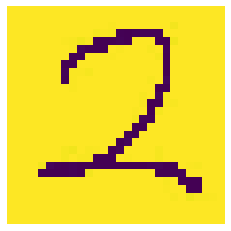

In [7]:

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from matplotlib import pyplot as plt

image = load_img("imgs/2_001.jpg", color_mode="grayscale", target_size=(28,28))

plt.imshow(image)
plt.axis('off')


image_array = img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

print(image_array.dtype)
print(image_array.shape)

In [ ]:
import numpy as np
output_data = my_model.predict(image_array)
np.argmax(output_data[0])


In [8]:
preds = my_model.predict_classes(image_array)
print(preds)

[7]


In [ ]:
print(output_data)